# CM2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Iris

#### Pairplot for IRIS

In [13]:
df_iris = pd.read_csv('iris_dataset_missing.csv')
df_iris_org = df_iris.copy()

Figure1 Pairplot of Iris data


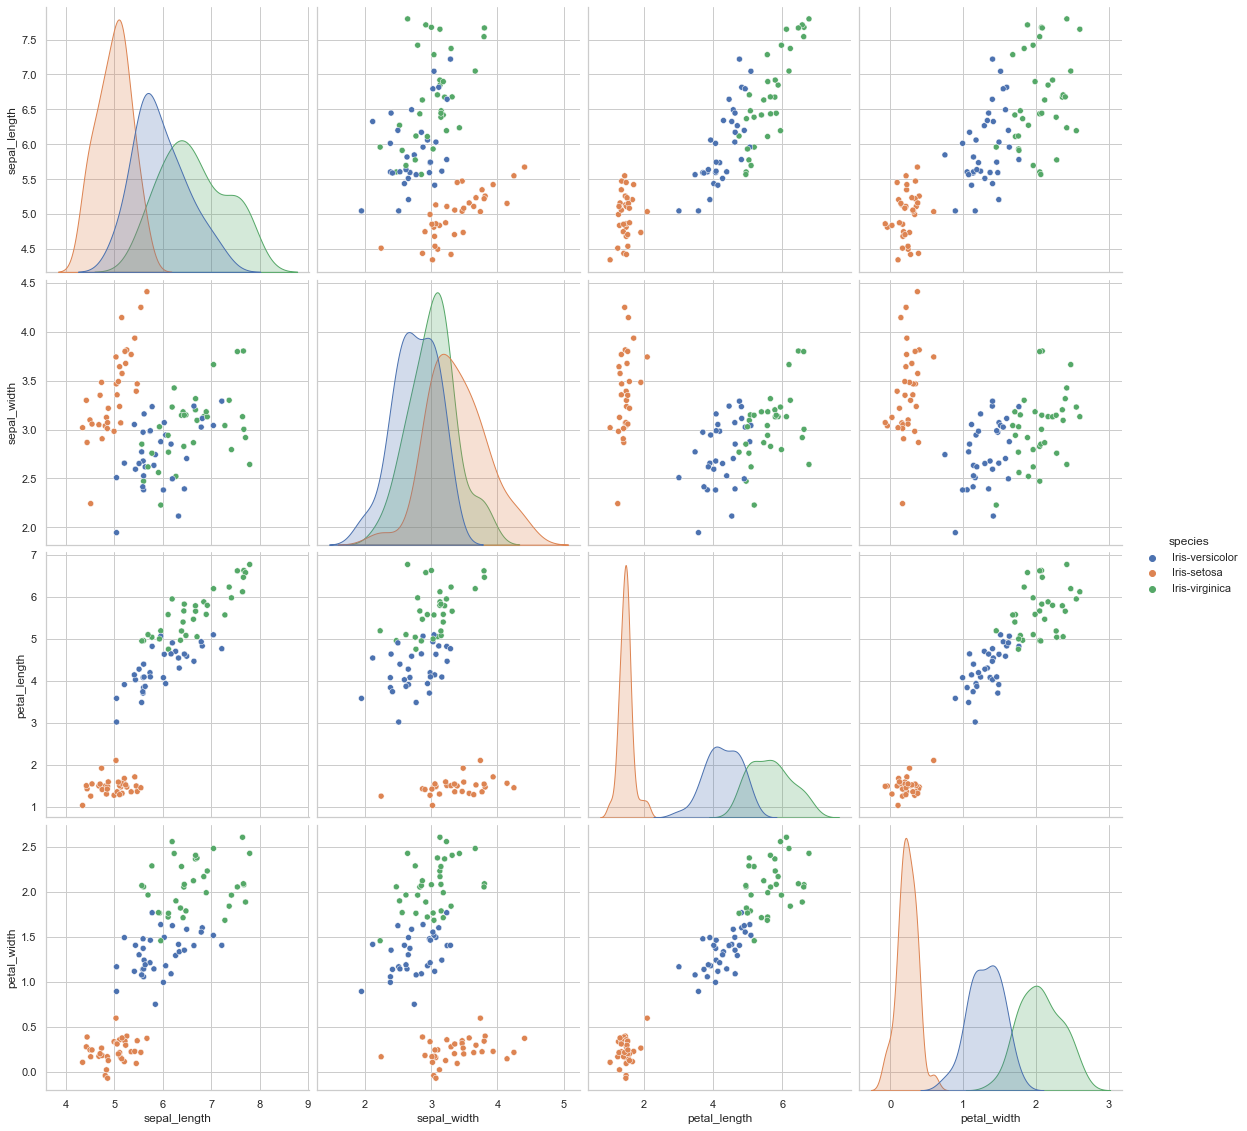

In [21]:
sb.set(style='white')
sb.set_style("whitegrid")
sb.pairplot(df_iris, hue='species', height = 4)
print('Figure1 Pairplot of Iris data')

In [89]:
def minmax_scaling(a):
    xx=a
    a_std = (xx- xx.min(axis = 0)) / (xx.max(axis = 0) - xx.min(axis = 0))
    return a_std

Figure2 Pairplot of Iris data after minmax normalization


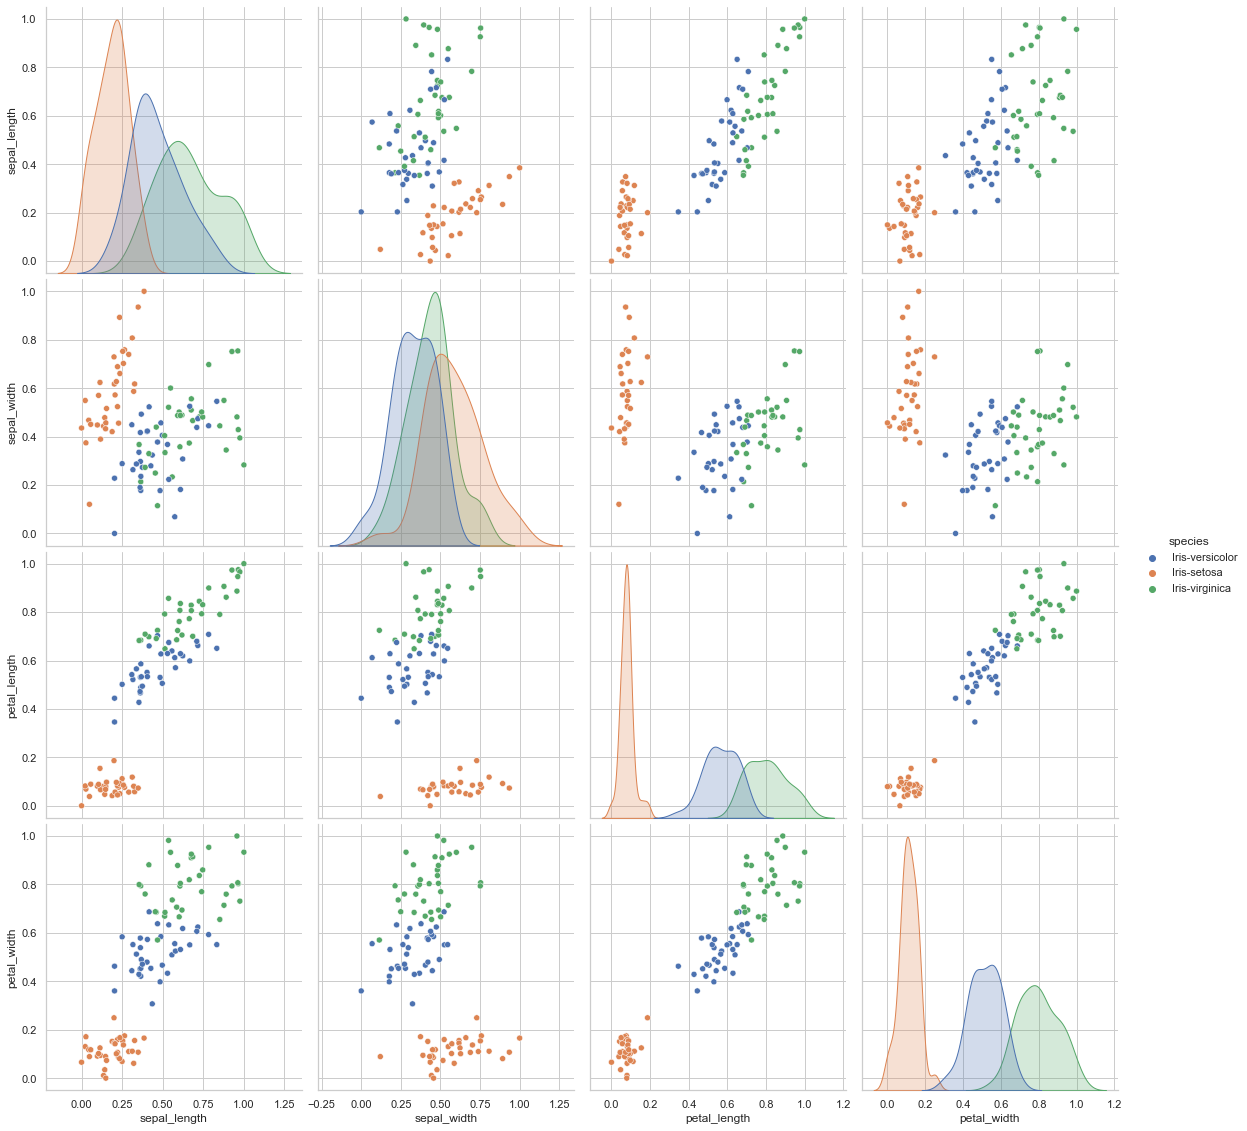

In [22]:
mf_iris = df_iris_org.copy()
mf_iris['sepal_length']=minmax_scaling(mf_iris['sepal_length'])
mf_iris['sepal_width']=minmax_scaling(mf_iris['sepal_width'])
mf_iris['petal_length']=minmax_scaling(mf_iris['petal_length'])
mf_iris['petal_width']=minmax_scaling(mf_iris['petal_width'])
sb.set(style='white')
sb.set_style("whitegrid")
sb.pairplot(mf_iris, hue='species', height = 4)
print('Figure2 Pairplot of Iris data after minmax normalization')

Figure3 Pairplot of Iris data after zscore normalization


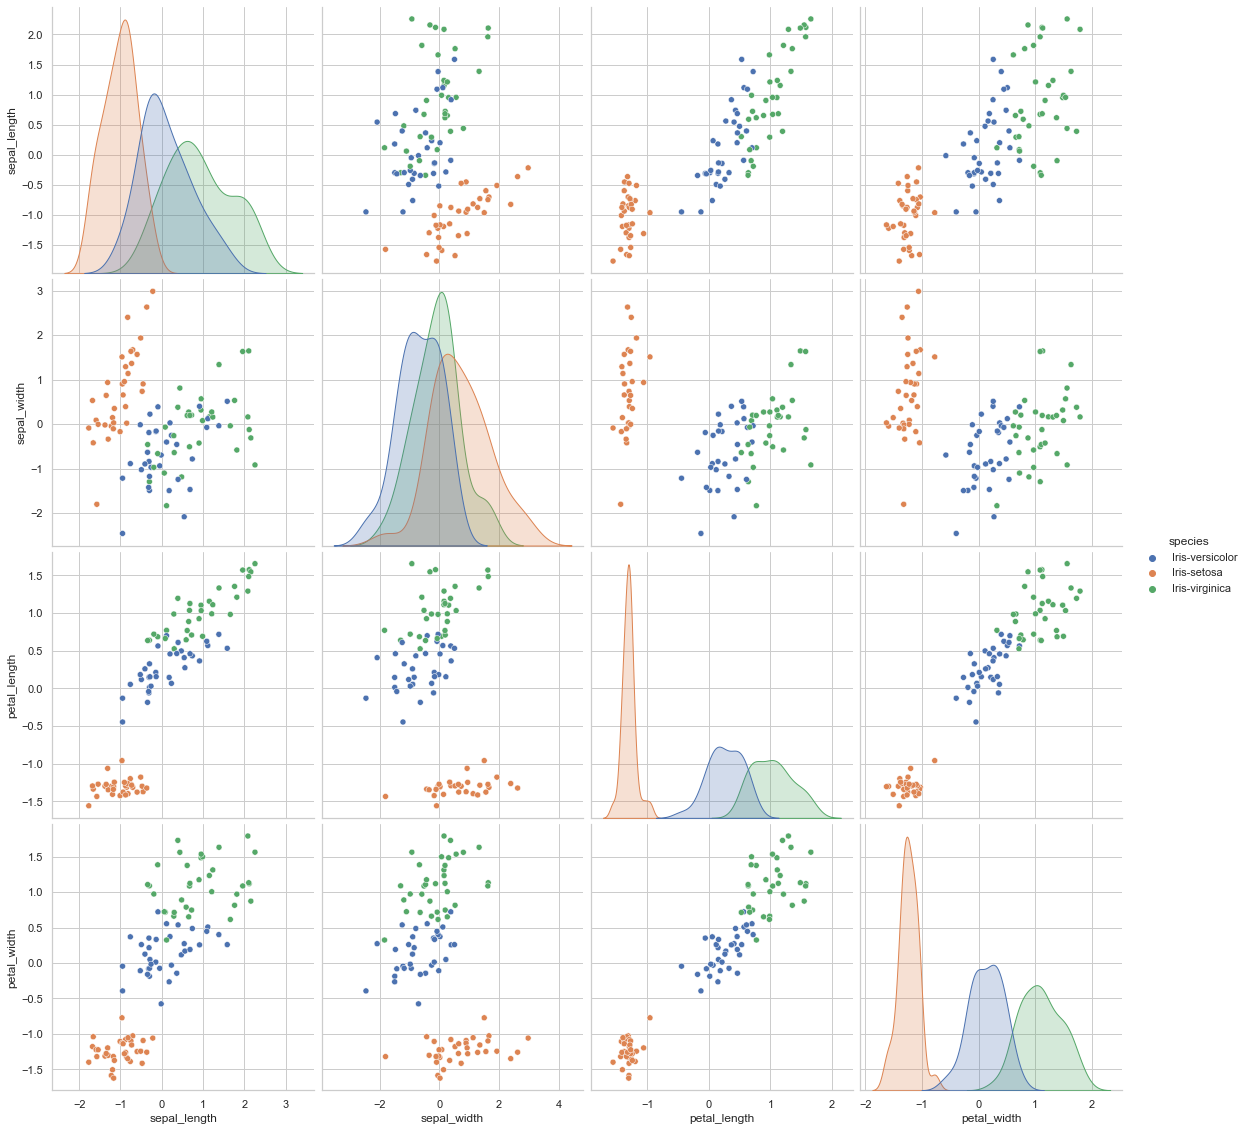

In [23]:
def zscore(a):
    xx=a
    a_std = (xx- np.mean(xx)) / (np.std(xx))
    return a_std
zf_iris=df_iris_org.copy()
zf_iris['sepal_length']=zscore(zf_iris['sepal_length'])
zf_iris['sepal_width']=zscore(zf_iris['sepal_width'])
zf_iris['petal_length']=zscore(zf_iris['petal_length'])
zf_iris['petal_width']=zscore(zf_iris['petal_width'])
sb.set(style='white')
sb.set_style("whitegrid")
sb.pairplot(zf_iris, hue='species', height = 4)
print('Figure3 Pairplot of Iris data after zscore normalization')

Based on the figures, the distribution of data is controlled by normalization. It is like what we discussed in CM1.

## Heart-Disease Dataset

### Feature selection

In [53]:
df = pd.read_csv('heart_disease_missing.csv')
df_org = df.copy()

Forward-fill propagates the last observed non-null value forward until another non-null value is encountered.

In [75]:
if(df.isnull().values.any()):
    df = df.fillna(method = 'ffill')

#### Removing outliers based on varinace in zscore normalization

In [60]:
df = df[(np.abs(zscore(df)) < 4).all(axis=1)]

#### Selection of highly correlated data with target

In this section, the features with correlation with target have been chosen for pairplots. 

In [94]:
corr_Th = 0.4 #correlation threshold
cor = df.corr().abs()
R_F= abs(cor['target'])
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
dropped = [column for column in upper.columns if any(upper[column] > corr_Th)]
df_corr = df_norm_corr.drop(df_norm_corr[dropped], axis=1)
df_corr = df_corr[[Cs for Cs in df_corr.columns if Cs != 'target']]
print('Selected features: ', df_norm_corr.columns)

Selected features:  Index(['cp', 'thalach', 'exang', 'oldpeak', 'target'], dtype='object')


Figure4 Pairplots of heart disease data


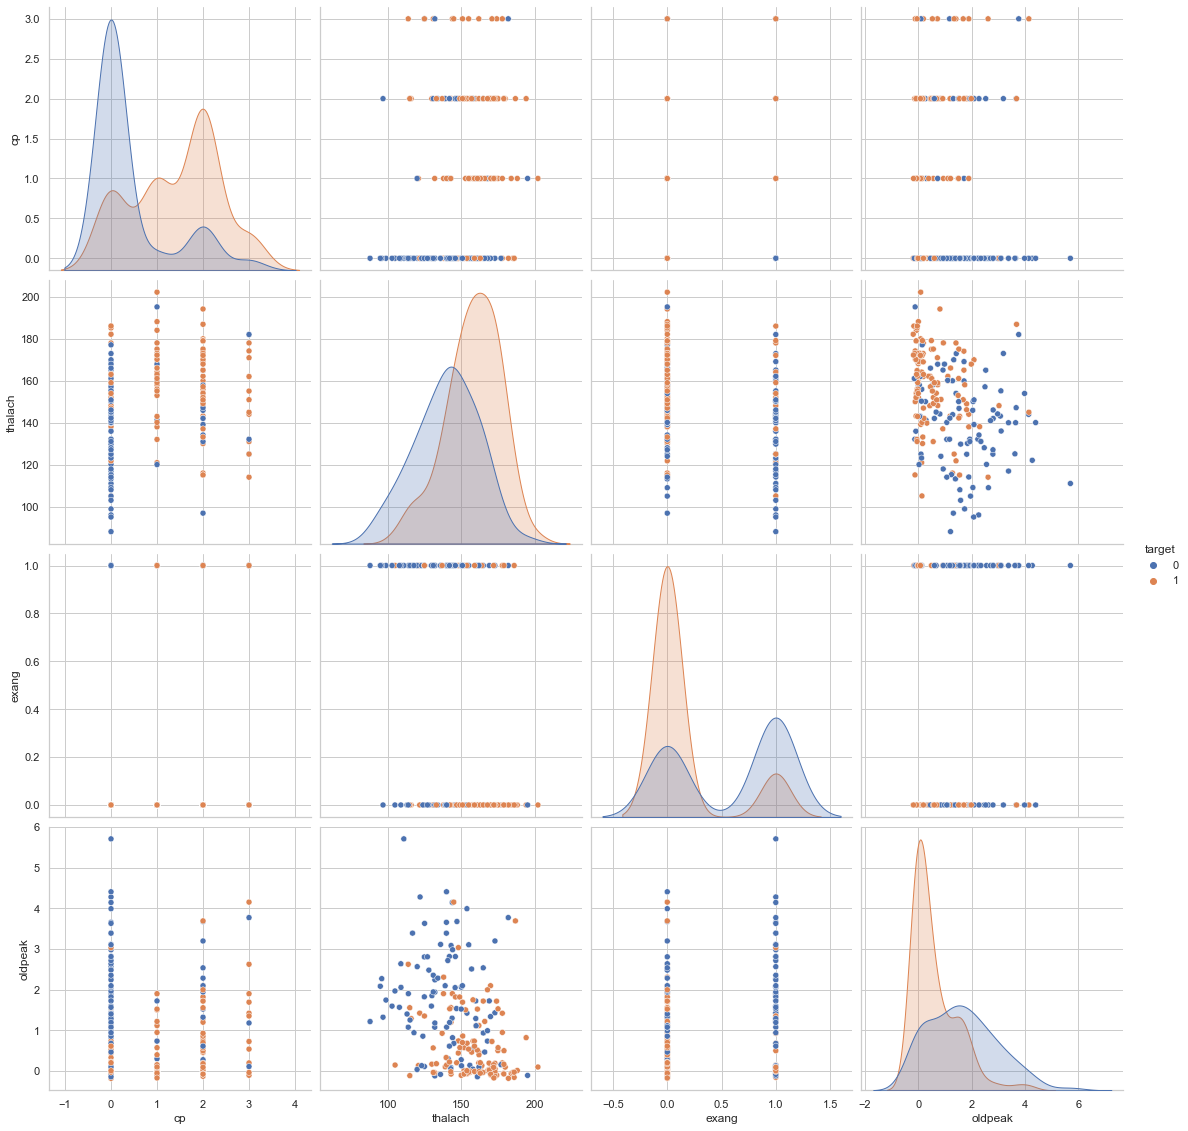

In [86]:
df_selected = df[[ 'cp', 'thalach', 'exang', 'oldpeak', 'target']]
sb.set(style='white')
sb.set_style("whitegrid")
sb.pairplot(df_selected, hue='target', height = 4)
print('Figure4 Pairplots of heart disease data')

## Refrences:
http://seaborn.pydata.org/tutorial/aesthetics.html
https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531
https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
https://www.w3resource.com/python-exercises/pandas/missing-values/python-pandas-missing-values-exercise-15.php 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html https://stackoverflow.com/questions/29156653/ipython-jupyter-problems-saving-notebook-as-pdf